In [18]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
# 데이터 불러오기
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-07-29 08:06:49--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.250.4.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.2’

cats_and_dogs_filte 100%[===================>]  65.43M   275MB/s    in 0.2s    

2022-07-29 08:06:49 (275 MB/s) - ‘cats_and_dogs_filtered.zip.2’ saved [68606236/68606236]



In [20]:
!unzip -qq /content/cats_and_dogs_filtered.zip

replace cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [142]:
X = []

# cat : 0, dog : 1
y = []

In [143]:
import os

cat_list = os.listdir('/content/cats_and_dogs_filtered/train/cats')
len(cat_list)

1000

In [144]:
from PIL import Image
for fn in cat_list:
  im = Image.open('/content/cats_and_dogs_filtered/train/cats/' + fn)
  new_image = im.resize((128,128))
  img = np.array(new_image)
  X.append(img)
  y.append(0)


In [145]:
dog_list = os.listdir('/content/cats_and_dogs_filtered/train/dogs')
len(dog_list)

1000

In [146]:
from PIL import Image
for fn in dog_list:
  im = Image.open('/content/cats_and_dogs_filtered/train/dogs/' + fn)
  new_image = im.resize((128,128))
  img = np.array(new_image)
  X.append(img)
  y.append(1)

In [147]:
# X, y

X = np.array(X)
y = np.array(y)

In [148]:
X.shape, y.shape

((2000, 256, 256, 3), (2000,))

In [149]:
# minmax_scaling 후 train, test, val 나누기
X = X/255

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [118]:
# 모델 만들기
def build_model():


  model = keras.Sequential([
      layers.Conv2D(16, (3,3), input_shape=(64, 64, 3), activation = 'relu'),
      layers.Conv2D(32, (3,3)),
      layers.BatchNormalization(),
      layers.ReLU(),
      layers.MaxPool2D((2,2)),
      layers.Dropout(0.2),

      layers.Flatten(),
      layers.Dense(32, activation = 'relu'),
      layers.Dense(16, activation = 'relu'),
      layers.Dense(1, activation = 'sigmoid')

  ])
  return model

In [100]:
model = build_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 16)        448       
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 60, 32)        4640      
                                                                 
 batch_normalization_11 (Bat  (None, 60, 60, 32)       128       
 chNormalization)                                                
                                                                 
 re_lu_11 (ReLU)             (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 30, 30, 32)       

In [101]:
# 모델 컴파일
adam = keras.optimizers.Adam(learning_rate = 0.0002)

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [102]:
# 모델 학습

EPOCHS = 30
BATCH_SIZE = 64

history = model.fit(X_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE, validation_data = (X_val, y_val))

Epoch 1/30
25/25 [==============================] - 1s 21ms/step - loss: 0.8230 - acc: 0.5525 - val_loss: 0.6892 - val_acc: 0.5425
Epoch 2/30
25/25 [==============================] - 0s 13ms/step - loss: 0.5845 - acc: 0.6862 - val_loss: 0.6840 - val_acc: 0.6250
Epoch 3/30
25/25 [==============================] - 0s 13ms/step - loss: 0.5016 - acc: 0.7656 - val_loss: 0.6819 - val_acc: 0.5450
Epoch 4/30
25/25 [==============================] - 0s 13ms/step - loss: 0.4394 - acc: 0.8056 - val_loss: 0.6715 - val_acc: 0.6375
Epoch 5/30
25/25 [==============================] - 0s 14ms/step - loss: 0.3868 - acc: 0.8300 - val_loss: 0.6588 - val_acc: 0.7150
Epoch 6/30
25/25 [==============================] - 0s 13ms/step - loss: 0.3340 - acc: 0.8656 - val_loss: 0.6618 - val_acc: 0.6200
Epoch 7/30
25/25 [==============================] - 0s 14ms/step - loss: 0.3009 - acc: 0.8731 - val_loss: 0.6449 - val_acc: 0.7100
Epoch 8/30
25/25 [==============================] - 0s 13ms/step - loss: 0.2181 - a

In [103]:
# 결과 시각화

def plot_history(history):
  hist = history.history
  plt.figure(figsize = (20, 12))
  plt.subplot(1, 2, 1)
  plt.plot(history.epoch, hist['loss'], label = 'loss')
  plt.plot(history.epoch, hist['val_loss'], label = 'val_loss')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(history.epoch, hist['acc'], label = 'acc')
  plt.plot(history.epoch, hist['val_acc'], label = 'val_acc')
  plt.legend()
  plt.show()

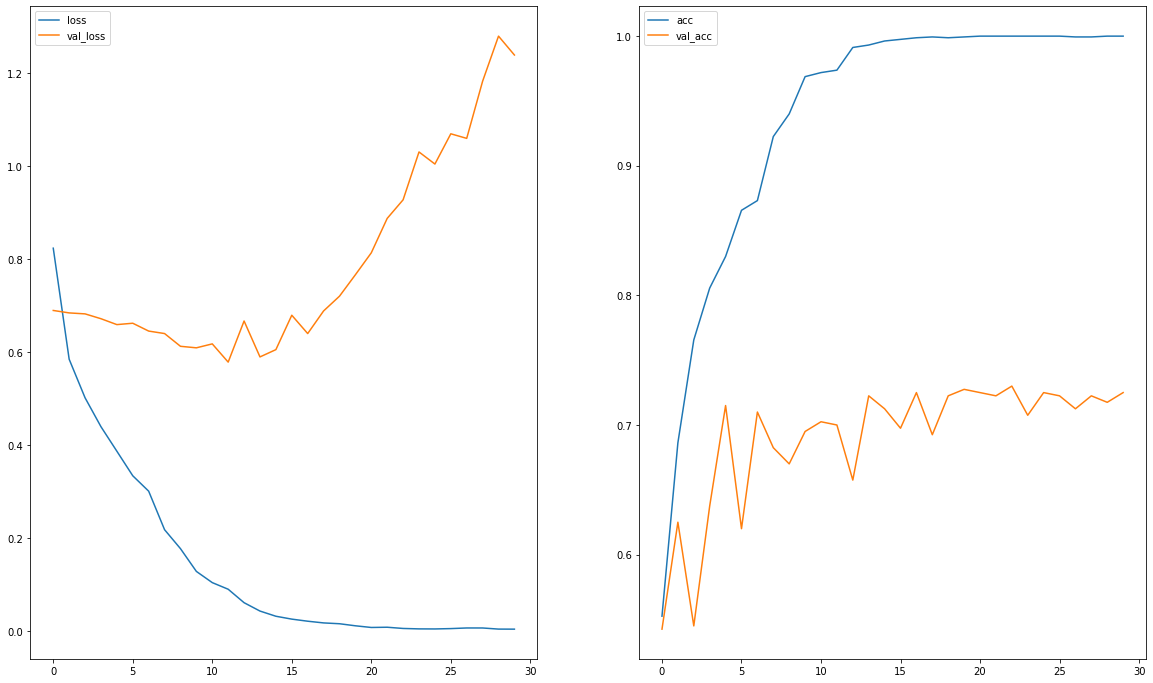

In [104]:
plot_history(history)

In [105]:
y_pred = model.predict(X_test)
y_pred

array([[9.78705823e-01],
       [6.44308031e-01],
       [1.37704043e-02],
       [9.99922872e-01],
       [9.99999523e-01],
       [1.36318773e-01],
       [1.81077106e-04],
       [8.57595413e-04],
       [1.14040810e-03],
       [3.80141573e-04],
       [3.70852165e-02],
       [9.50586400e-05],
       [9.97545302e-01],
       [6.06097001e-06],
       [9.46733057e-01],
       [1.11425892e-01],
       [1.71003005e-04],
       [1.53776249e-02],
       [6.41815714e-04],
       [5.16303927e-02],
       [1.99419707e-02],
       [1.17685227e-02],
       [9.30513314e-04],
       [6.45559072e-01],
       [9.99991655e-01],
       [8.64431620e-01],
       [1.61794433e-03],
       [1.67501092e-01],
       [2.80338165e-04],
       [9.47792888e-01],
       [9.30790484e-01],
       [9.44650531e-01],
       [7.25959148e-03],
       [6.43878448e-05],
       [1.12138505e-05],
       [9.11443233e-01],
       [1.80394966e-02],
       [9.99989867e-01],
       [7.59799480e-01],
       [1.59587635e-05],


In [106]:
y_pred = (y_pred > 0.5).astype(np.int32).flatten()
y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [107]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.725

# 전이학습

In [119]:
# ImageNet으로 학습된 VGG16 모델 가져와서 이진 분류

# include_top = False --> 뉴럴 네트워크 부분 안가져옴(변화시켜야 하므로)

In [1]:
vgg16 = tf.keras.applications.VGG16(
    weights= 'imagenet',
    include_top = False,
    input_shape=(128,128,3),
)

vgg16.trainable=False

model = keras.Sequential([
        vgg16,
        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        layers.Dense(1,activation='sigmoid')
])
vgg16.summary()

NameError: ignored

In [136]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [137]:
Epochs = 100
batch_size=128
history = model.fit(X_train,y_train,epochs=Epochs,batch_size=batch_size,validation_data=[X_val,y_val])

Epoch 1/40
50/50 [==============================] - 2s 26ms/step - loss: 0.5336 - acc: 0.7294 - val_loss: 0.5053 - val_acc: 0.7350
Epoch 2/40
50/50 [==============================] - 1s 21ms/step - loss: 0.4253 - acc: 0.8006 - val_loss: 0.4135 - val_acc: 0.8150
Epoch 3/40
50/50 [==============================] - 1s 21ms/step - loss: 0.3825 - acc: 0.8188 - val_loss: 0.4271 - val_acc: 0.7975
Epoch 4/40
50/50 [==============================] - 1s 22ms/step - loss: 0.3582 - acc: 0.8319 - val_loss: 0.4588 - val_acc: 0.7725
Epoch 5/40
50/50 [==============================] - 1s 22ms/step - loss: 0.3465 - acc: 0.8381 - val_loss: 0.4056 - val_acc: 0.8175
Epoch 6/40
50/50 [==============================] - 1s 22ms/step - loss: 0.2957 - acc: 0.8737 - val_loss: 0.4190 - val_acc: 0.8000
Epoch 7/40
50/50 [==============================] - 1s 22ms/step - loss: 0.2638 - acc: 0.8956 - val_loss: 0.4051 - val_acc: 0.8050
Epoch 8/40
50/50 [==============================] - 1s 22ms/step - loss: 0.2461 - a

In [140]:
# 결과 시각화

def plot_history(history):
  hist = history.history
  plt.figure(figsize = (20, 12))
  plt.subplot(1, 2, 1)
  plt.plot(history.epoch, hist['loss'], label = 'loss')
  plt.plot(history.epoch, hist['val_loss'], label = 'val_loss')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(history.epoch, hist['acc'], label = 'acc')
  plt.plot(history.epoch, hist['val_acc'], label = 'val_acc')
  plt.legend()
  plt.show()

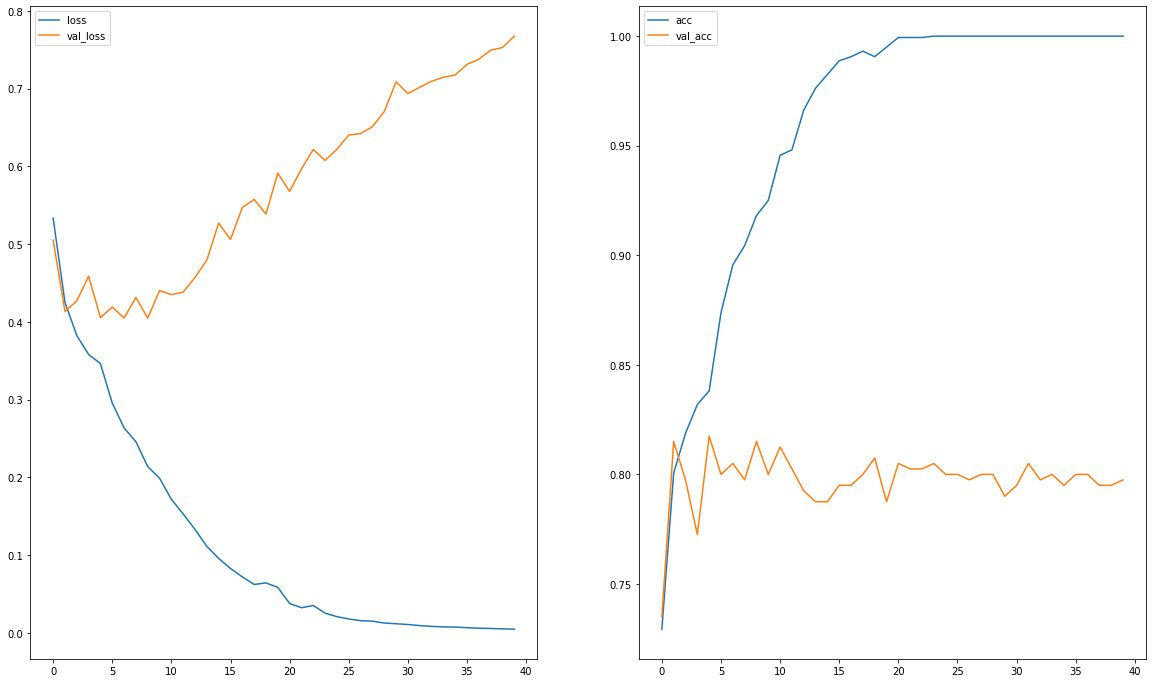

In [141]:
plot_history(history)